In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the datasets
##### bechdel, movies_metadata and links

In [2]:
bechdeldf = pd.read_csv('csvdata/bechdel/movies.csv')

In [4]:
#movies_metadatadf = pd.read_csv('csvdata/tmdb/movies_metadata.csv')
#low memory flag on for better machines
movies_metadatadf = pd.read_csv('csvdata/tmdb/movies_metadata.csv',low_memory=False)

In [21]:
#Loading the tmdb credits dataset
creditsdf = pd.read_csv('csvdata/tmdb/credits.csv')

In [8]:
# Loading the tmdb links dataset
linksdf = pd.read_csv('csvdata/tmdb/links.csv')

In [5]:
bechdeldf.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [6]:
creditsdf.head()

NameError: name 'creditsdf' is not defined

In [9]:
linksdf.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
#Converting the Imdb Id column to integer type column names imdbnew
linksdf["imdbnew"]=linksdf["imdbId"].astype(int)
#linksdf.head()

In [13]:
bechdeldf["imdbtemp"]=bechdeldf["imdb"].str.slice(2) #slicing the id to remove tt and making it a separate column called imdbtemp

In [14]:
bechdeldf["imdbasint"]=bechdeldf["imdbtemp"].astype(int) #converting the new column to integer

In [15]:
bechdeldf.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,imdbtemp,imdbasint
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0,1711425,1711425
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0,1343727,1343727
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0,2024544,2024544
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0,1272878,1272878
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0,0453562,453562


In [16]:
bechdeldf.rename(columns={'imdbnew':'imdbfin'},inplace=True)
linksdf.rename(columns={'imdbnew':'imdbfin'},inplace=True)

In [17]:
bechdeldf.drop("period code", axis = 1,inplace=True)

In [18]:
bechdeldf.drop("decade code", axis = 1, inplace=True)
#removing the columns we don't need

In [19]:
bechdeldf.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,imdbtemp,imdbasint
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1711425,1711425
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1343727,1343727
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,2024544,2024544
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1272878,1272878
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,0453562,453562


In [26]:
linksdf.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
imdbfin      int32
dtype: object

In [39]:
bechdeldf.dtypes

year                int64
imdb               object
title              object
test               object
clean_test         object
binary             object
budget              int64
domgross          float64
intgross          float64
code               object
budget_2013$        int64
domgross_2013$    float64
intgross_2013$    float64
imdbtemp           object
imdbasint           int32
dtype: object

In [22]:
bechdel_links = pd.merge(bechdeldf, linksdf, left_on='imdbasint',right_on='imdbfin', how='left') #joined the two datasets

In [23]:
bechdel_links.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,imdbtemp,imdbasint,movieId,imdbId,tmdbId,imdbfin
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1711425,1711425,100507.0,1711425.0,107811.0,1711425.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1343727,1343727,96737.0,1343727.0,49049.0,1343727.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,2024544,2024544,105844.0,2024544.0,76203.0,2024544.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1272878,1272878,103883.0,1272878.0,136400.0,1272878.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,0453562,453562,101895.0,453562.0,109410.0,453562.0


In [94]:
#Calculating the number of passing/failing movies on basis of the bechdel test
passcounts=bechdel_links.binary.value_counts()["PASS"]
failcounts=bechdel_links.binary.value_counts()["FAIL"]
print("The no. of movies that passed the bechdel test are:", passcounts)
print("The no. of movies that failed the bechdel test are:", failcounts)
print("The sample size of the dataset considered was: ", bechdel_links.shape[0])
print("Percentage of movies that pass the bechdel test are: ", (passcounts/bechdel_links.shape[0]) * 100 )

The no. of movies that passed the bechdel test are: 803
The no. of movies that failed the bechdel test are: 991
The sample size of the dataset considered was:  1794
Percentage of movies that pass the bechdel test are:  44.760312151616496


,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,imdbtemp,imdbasint,movieId,imdbId,tmdbId,imdbfin
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1711425,1711425,100507.0,1711425.0,107811.0,1711425.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1343727,1343727,96737.0,1343727.0,49049.0,1343727.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,2024544,2024544,105844.0,2024544.0,76203.0,2024544.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1272878,1272878,103883.0,1272878.0,136400.0,1272878.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,0453562,453562,101895.0,453562.0,109410.0,453562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0,0067741,67741,3729.0,67741.0,482.0,67741.0
1790,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0,0067800,67800,6301.0,67800.0,994.0,67800.0
1791,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0,0067116,67116,1953.0,67116.0,1051.0,67116.0
1792,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0,0067992,67992,1073.0,67992.0,252.0,67992.0


binary  year
FAIL    1971     5
        1972     2
        1973     4
        1974     5
        1975     5
                ..
PASS    2009    42
        2010    61
        2011    53
        2012    37
        2013    46
Name: imdb, Length: 85, dtype: int64


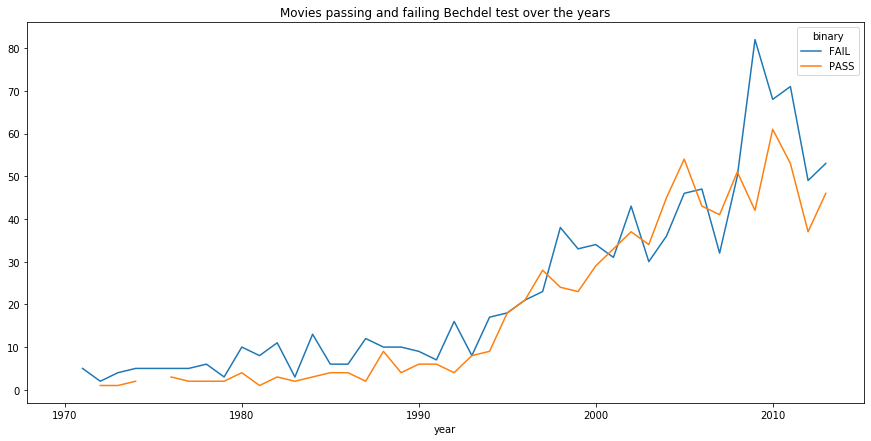

In [106]:
count_series = bechdel_links.groupby(['binary', 'year'])['imdb'].count() # give a better variable name
#making separate dataframes for movies passing and failing
print(count_series)
# plotting the passing and failing number of movies over time
fig, ax = plt.subplots(figsize=(15,7))
title = "Movies passing and failing Bechdel test over the years"
count_series.unstack('binary').plot(kind='line',ax=ax,title = title)

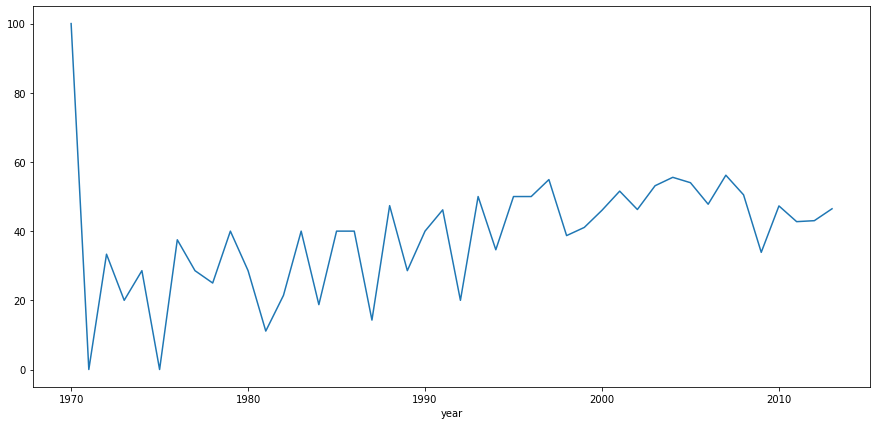

In [112]:
unstacked_movies = count_series.unstack('binary')  # Failing movies
unstacked_movies['FAIL'] = unstacked_movies['FAIL'].fillna(0)
unstacked_movies['PASS'] = unstacked_movies['PASS'].fillna(0)
unstacked_movies['Pass Percentage'] = (unstacked_movies.PASS * 100 ) / (unstacked_movies.PASS + unstacked_movies.FAIL)

# plotting the passing and failing number of movies over time
fig, ax = plt.subplots(figsize=(15,7))
title = "Pass percentage of movies Bechdel test over the years"
unstacked_movies['Pass Percentage'].plot(kind='line', ax=ax)

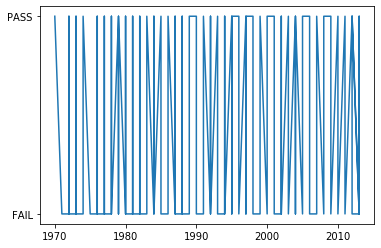

In [80]:
#DON'T THINK THIS BLOCK IS NECESSARY NOW

#plotting a time series graph to show how many movies in a year passed the test and how many didn't, 
#hypothesis:more movies have passed bechdel test over the years
x=bechdel_links["year"]
y=bechdel_links["binary"]
plt.plot(x,y)
#this plot is wrong it needs to be changed